# Ayudantia T5a

# IIC2115

### Importamos geopandas

In [1]:
import geopandas as gpd

## M1

### Cargamos los archivos de esta mision

In [2]:
distritos = gpd.read_file('Data/Parte 1/Distritos Censales/Distritos Censales RM.shp')
chile_urbano = gpd.read_file('Data/Parte 1/Areas Urbanas/areas_urbanas.shp')

### Revisamos los datos

In [3]:
distritos.head(2)

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,geometry
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6..."
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,903.0,228.0,2741.0,1166659.89,23.49,21.10,"POLYGON ((345880.280 6299633.958, 345961.610 6..."


In [4]:
distritos.describe()

,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2
count,4.490000e+02,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,4.490000e+02,449.000000,449.000000
mean,1.320575e+06,198.677060,1221.055679,1239.336303,799.746102,215.561247,3674.376392,3.427451e+07,21.551871,5.048530
std,1.553424e+04,230.595397,1209.411846,1090.013162,870.943145,519.746952,2840.039537,1.390632e+08,17.448771,5.664918
min,1.310101e+06,0.000000,20.000000,11.000000,2.000000,0.000000,48.000000,3.673118e+05,0.000000,0.000000
25%,1.311018e+06,45.000000,373.000000,496.000000,216.000000,10.000000,1801.000000,1.028728e+06,1.810000,0.790000
50%,1.312204e+06,123.000000,924.000000,1110.000000,547.000000,43.000000,3548.000000,1.682413e+06,23.030000,4.220000
75%,1.320305e+06,277.000000,1843.000000,1632.000000,1046.000000,147.000000,4756.000000,1.732345e+07,35.090000,6.230000
max,1.360503e+06,2036.000000,14371.000000,8811.000000,5481.000000,5135.000000,26477.000000,2.022821e+09,73.240000,41.130000


In [5]:
chile_urbano.head(2)

,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,geometry
0,Chiguayante,Ciudad,29855.998337,1.038076e+07,"POLYGON ((140044.634 5911024.284, 140051.361 5..."
1,Lota,Ciudad,14233.349738,5.262642e+06,"POLYGON ((131359.666 5889462.902, 131475.343 5..."


Es importante notar que las funciones de pandas tambien se pueden utilizar en geopandas

<AxesSubplot:>

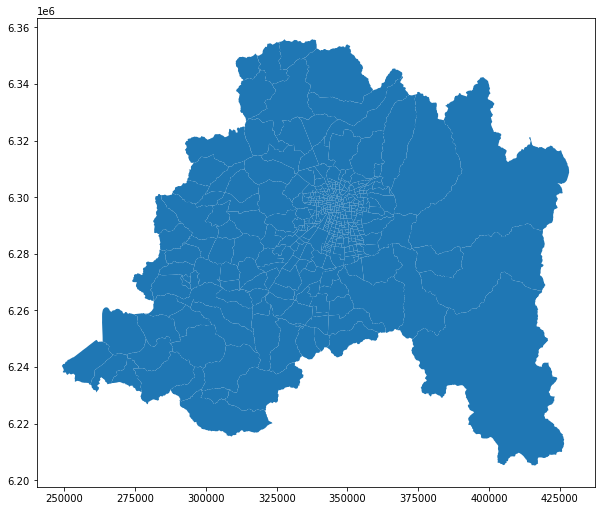

In [6]:
distritos.plot(figsize=(10,10))

<AxesSubplot:>

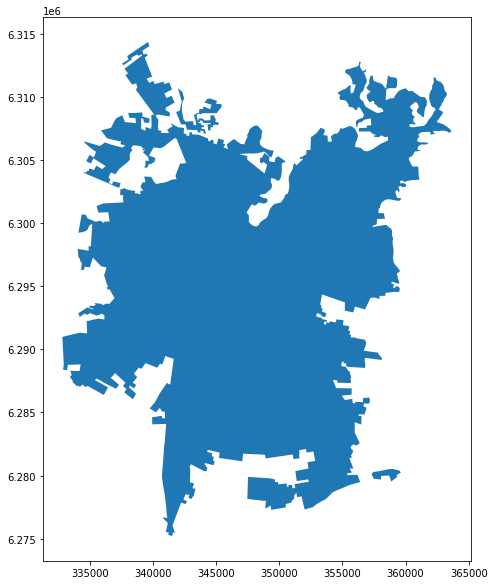

In [7]:
santiago_urbano = chile_urbano.loc[chile_urbano['NOMBRE']=='Santiago']
santiago_urbano.plot(figsize = (10,10))

Antes de juntar o trabajar con ambos archivos, tenemos que revisar sus proyecciones

In [8]:
distritos.crs

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
santiago_urbano.crs

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

En este caso ambos tienen la misma proyeccion, por lo tanto creamos los distritos urbanos (con la intersección)

In [27]:
distritos_urbano = gpd.overlay(distritos, chile_urbano, how='intersection')

<AxesSubplot:>

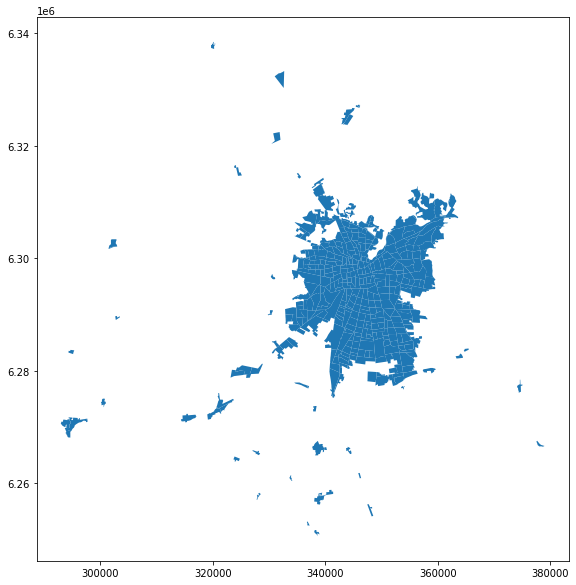

In [28]:
distritos_urbano.plot(figsize=(10,10))

Tenemos la informacion por distrito, ahora necesitamos obtener la informacion solicitada

In [29]:
distritos_urbano.head(1)

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,...,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,geometry
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,...,365.0,3412.0,704315.75,48.44,31.09,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((346775.511 6299463.724, 346788.392 6..."


Al visualizar vemos que actualmente se tiene el precio del metro cuadrado en UF, como necesitamos el valor en pesos, necesitamos multiplicar por la conversion (utilizamos la del 22-11-2021): 30.657,03 (SII, 2021)

In [30]:
distritos_urbano['Precio']=30657.03*distritos_urbano['Area']*distritos_urbano['1_UF_M2']

Revisamos...

In [31]:
distritos_urbano.head(2)

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,...,ADIMARK_T,Area,Densidad,1_UF_M2,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,geometry,Precio
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,...,3412.0,704315.75,48.44,31.09,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((346775.511 6299463.724, 346788.392 6...",6.713024e+11
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,...,2741.0,1166659.89,23.49,21.10,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((345880.280 6299633.958, 345961.610 6...",7.546695e+11


Vemos que si esta la nueva columna y finalmente realizamos el plot con esta nueva columna

<AxesSubplot:>

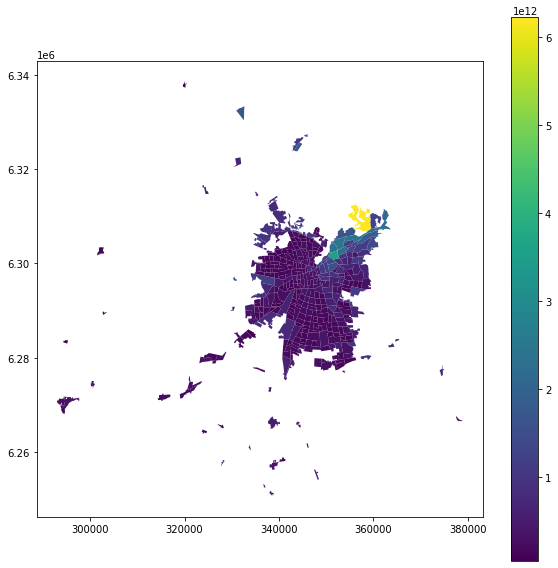

In [32]:
distritos_urbano.plot(figsize=(10,10),column='Precio', legend=True)

## M2

Cargamos el shape de estaciones de metro

In [33]:
estaciones_metro = gpd.read_file('Data/Parte 1/Metro 2020/Estaciones_2020/Estaciones_2020.shp')

Revisamos

In [34]:
estaciones_metro.head(2)

,OBJECTID,ID_LINEA,LINEA,ESTACION,NOMBRE,POINT_X,POINT_Y,geometry
0,2,2,L2,EL PARRON,El Parrón,345717.3664,6.289105e+06,POINT (345717.366 6289105.444)
1,3,5,L5,CUMMING,Cumming,344899.1198,6.298782e+06,POINT (344899.120 6298781.571)


<AxesSubplot:>

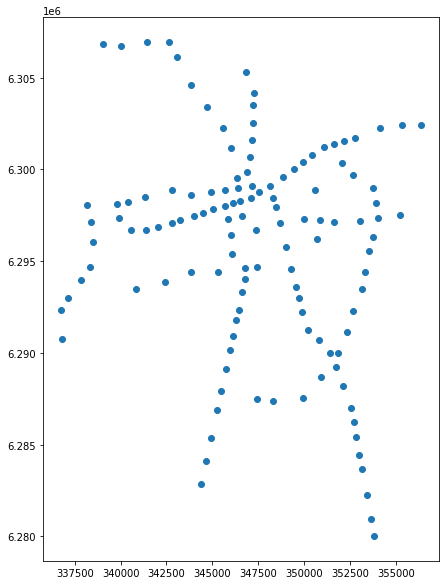

In [35]:
estaciones_metro.plot(figsize=(10,10))

Revisamos la proyeccion

In [36]:
estaciones_metro.crs

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Creamos un buffer para conocer los distritos que estan a menos de 100 metros de una linea de metro

In [37]:
buffer_metro = estaciones_metro.copy()
buffer_metro.geometry = buffer_metro.buffer(100)

<AxesSubplot:>

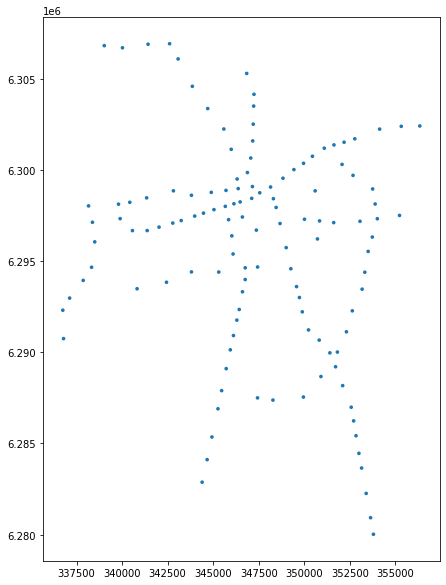

In [38]:
buffer_metro.plot(figsize=(10,10))

In [39]:
buffer_metro.head(2)

,OBJECTID,ID_LINEA,LINEA,ESTACION,NOMBRE,POINT_X,POINT_Y,geometry
0,2,2,L2,EL PARRON,El Parrón,345717.3664,6.289105e+06,"POLYGON ((345817.366 6289105.444, 345816.885 6..."
1,3,5,L5,CUMMING,Cumming,344899.1198,6.298782e+06,"POLYGON ((344999.120 6298781.571, 344998.638 6..."


### Intersecamos los distritos con el buffer 

In [40]:
distritos_metro = gpd.sjoin(distritos, buffer_metro, predicate='intersects')

Elimino los posibles duplicados

In [41]:
distritos_metro=distritos_metro.drop_duplicates(subset=['CODIGO'])

In [42]:
distritos_metro.describe()

,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,index_right,OBJECTID,ID_LINEA,POINT_X,POINT_Y
count,1.700000e+02,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,1.700000e+02,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,1.700000e+02
mean,1.312202e+06,147.252941,1164.858824,1480.517647,1191.000000,355.400000,4339.029412,2.103443e+06,29.733941,8.381471,63.347059,67.188235,3.300000,261774.871247,4.739619e+06
std,3.676361e+03,165.201976,991.268939,1055.697617,999.792925,685.106111,2657.140892,3.260210e+06,13.279897,6.446510,39.930748,41.136084,1.722974,150459.144678,2.722983e+06
min,1.310101e+06,0.000000,37.000000,50.000000,11.000000,1.000000,178.000000,4.995834e+05,0.120000,0.860000,0.000000,2.000000,1.000000,0.000000,0.000000e+00
25%,1.310635e+06,33.000000,465.250000,956.250000,553.750000,41.500000,2789.250000,9.430947e+05,21.755000,4.552500,25.250000,28.250000,2.000000,336752.384125,6.280013e+06
50%,1.311702e+06,82.000000,892.500000,1274.000000,912.000000,108.500000,3967.500000,1.313560e+06,29.045000,6.305000,60.500000,63.500000,3.000000,346103.435750,6.292376e+06
75%,1.312307e+06,215.000000,1731.500000,1687.750000,1459.250000,303.750000,5329.000000,1.719703e+06,38.760000,9.797500,99.000000,105.000000,5.000000,351364.404450,6.298117e+06
max,1.340106e+06,751.000000,7544.000000,8811.000000,5481.000000,5135.000000,21244.000000,2.305681e+07,73.240000,41.130000,125.000000,131.000000,7.000000,356319.880900,6.305310e+06


Ahora para conocer la poblacion tan solo se tiene que multiplicar la densidad por el area. Y ordenamos con respecto a esta.

In [44]:
distritos_metro['Poblacion']=distritos_metro['Area']*distritos_metro['Densidad']
distritos_metro.head(1)

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,...,geometry,index_right,OBJECTID,ID_LINEA,LINEA,ESTACION,NOMBRE,POINT_X,POINT_Y,Poblacion
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,...,"POLYGON ((346775.511 6299463.724, 346788.392 6...",60,63,1,L1,SANTA LUCIA,Santa Lucía,347075.4514,6.298439e+06,34117054.93


In [45]:
distritos_metro_ranking = distritos_metro.sort_values(by=['Poblacion'], ascending=False)

In [46]:
distritos_metro_ranking.head()

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,...,geometry,index_right,OBJECTID,ID_LINEA,LINEA,ESTACION,NOMBRE,POINT_X,POINT_Y,Poblacion
245,Región Metropolitana De Santiago,131,Santiago,13124,Pudahuel,Santa Corina,1312406.0,724.0,7544.0,8811.0,...,"POLYGON ((334267.487 6301075.153, 334270.956 6...",90,94,5,L5,BARRANCAS,Barrancas,338375.2852,6.297140e+06,2.123532e+08
319,Región Metropolitana De Santiago,132,Cordillera,13201,Puente Alto,San Carlos,1320108.0,92.0,3321.0,7148.0,...,"POLYGON ((353187.333 6283228.924, 354229.424 6...",7,9,4,L4,LAS MERCEDES,Las Mercedes,353659.7532,6.280834e+06,1.659284e+08
198,Región Metropolitana De Santiago,131,Santiago,13119,Maipú,Los Pajaritos,1311920.0,63.0,1694.0,4987.0,...,"POLYGON ((338548.229 6295040.434, 338535.777 6...",93,97,5,L5,MONTE TABOR,Monte Tabor,337837.1587,6.293899e+06,1.295803e+08
359,Región Metropolitana De Santiago,134,Maipo,13401,San Bernardo,Cerro Negro,1340106.0,751.0,5634.0,4429.0,...,"POLYGON ((345629.332 6282579.726, 345629.299 6...",125,131,2,L2,HOSPITAL EL PINO,Hospital El Pino,0.0000,0.000000e+00,1.210293e+08
253,Región Metropolitana De Santiago,131,Santiago,13125,Quilicura,Manuel Antonio Matta,1312504.0,294.0,3193.0,4731.0,...,"POLYGON ((336046.667 6310246.061, 336424.704 6...",101,107,3,L3,LO CRUZAT,Lo Cruzat,0.0000,0.000000e+00,1.164224e+08


Aprovechamos a visualizar y podemos ver que mas alla de lugares muy densos como podria ser a la altura del centro. Se tiene que los distritos con mayor poblacion son distritos muy grandes en la periferia.

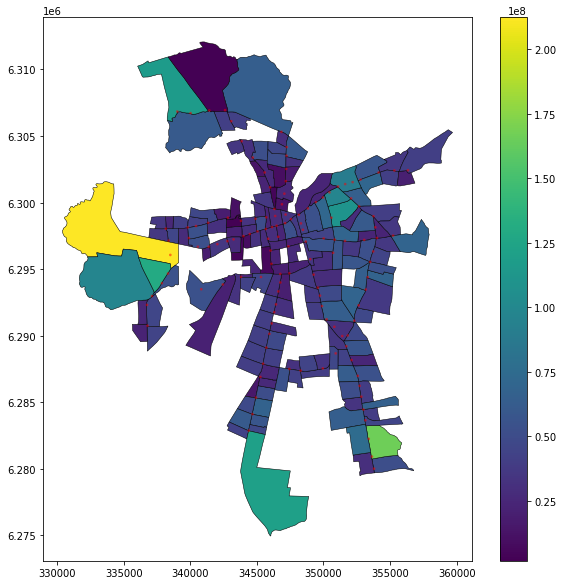

In [47]:
ax = distritos_metro.plot(figsize = (10,10), column = 'Poblacion', edgecolor = 'black', linewidth = 0.5,legend = True)
ax1 = buffer_metro.plot(ax=ax, alpha = 0.5, color = 'red')